# Linear Regression (simple) - Experience vs Salary 

* Project Scope: Applying Simple Linear Regression model on Experience-Salary data
* Data source: Salaries.csv

## 1.Import libraries

In [2]:
# Lets first make sure we are in our working directory before we start our project
# Import Data Analysis libraries
import numpy as np
import pandas as pd

# Import Data Visualisation libraries
import matplotlib.pyplot as plt

# For display in notebook
%matplotlib inline

## 2. Load data

In [3]:
# Importing dataset
dataset = pd.read_csv('Salary_Data.csv')

## 3. Lets view data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [24]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

This gives information about features and its datatypes. Also we now know that there are 30 records in this dataset

In [5]:
dataset.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


We can see that we have a feature 'YearsExperience' and target variable 'Salary'

## 4. Data Preprocessing - Step1

** a. Taking care of missing data, if any: **

In [7]:
dataset.isnull().sum()
# we can see the number of null records for each column

YearsExperience    0
Salary             0
dtype: int64

In [14]:
from sklearn.preprocessing import normalize

we dont have any null values in our dataset

** b. Categorical Data: **
* Lets check categorical variables in out data set both in features and also in output
* Then encode them into dummy variables 

We dont have any categorical data in our dataset

** c. Adding features if necessary: **

since we simple and straight forward dataset to apply Linear Regression model, we dont have any features to add

## 5. Let's analyze and visualize data

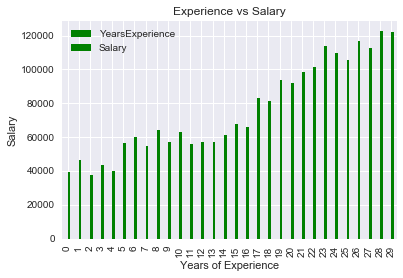

In [10]:
dataset.plot.bar(color='green')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

Based on data we can clearly see as experience increases, salary is increasing with few exceptions  

## 6. Data Preprocessing - Step2

** d. Lets split dataset into features/inputs/independent variables(X) and output/target variable(y) **

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

We now have feature vector X and target vector y

** e. Splitting Dataset into Training and Test sets: **
* Ideal split is 70/30 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
X_train

array([[  7.9],
       [  8.2],
       [  2.2],
       [  1.5],
       [  9. ],
       [  3. ],
       [  5.9],
       [  4.1],
       [  3.2],
       [  9.6],
       [  1.3],
       [  5.1],
       [  1.1],
       [  4.9],
       [ 10.5],
       [ 10.3],
       [  3.7],
       [  3.2],
       [  4. ],
       [  4. ],
       [  2.9]])

In [17]:
X_test

array([[ 5.3],
       [ 7.1],
       [ 3.9],
       [ 6. ],
       [ 4.5],
       [ 6.8],
       [ 9.5],
       [ 2. ],
       [ 8.7]])

In [18]:
y_train

array([ 101302.,  113812.,   39891.,   37731.,  105582.,   60150.,
         81363.,   57081.,   54445.,  112635.,   46205.,   66029.,
         39343.,   67938.,  121872.,  122391.,   57189.,   64445.,
         56957.,   55794.,   56642.])

In [19]:
y_test

array([  83088.,   98273.,   63218.,   93940.,   61111.,   91738.,
        116969.,   43525.,  109431.])

After the split, we now have X_train, X_test, y_train, y_test

**f. Feature Scaling **
* we can do feature scaling by standardization or normalization
* we dont need to feature scaling for output variables in classification problems

since we simple and straight forward dataset to apply Linear Regression model, we can ignore feature scaling

## 7. Fitting Linear Regression Model to the Training set 

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 8. Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [21]:
# print the intercept
print(lr.intercept_)

26049.5777154


In [27]:
coeff_df = pd.DataFrame(lr.coef_,columns=['Coefficient'])
coeff_df

,Coefficient
0,9202.233598


**Interpreting the coefficient:** 1 unit increase in YearsExperience is associated with an **increase of \$9202.233598 in salary **.

## 9. Predictions from our Model

Now we will use our X_test to see how our trained model will predict

In [29]:
y_pred = lr.predict(X_test)

## 10. Visualising the results

Lets plot graphs to visualize the Training and Test set results

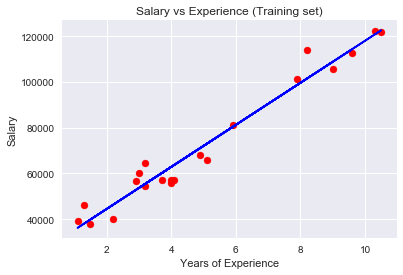

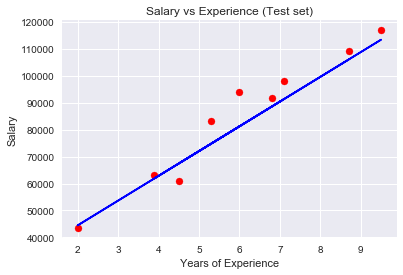

In [42]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

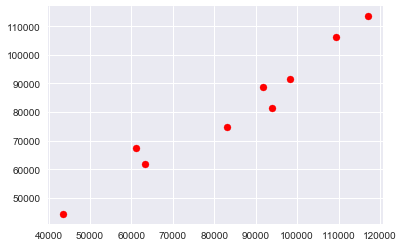

In [45]:
plt.scatter(y_test,y_pred, color ='red')
plt.show()

** Residual Histogram **

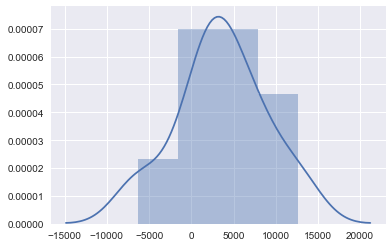

In [47]:
sns.distplot((y_test-y_pred));

** Regression Evaluation Metrics **

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5146.88673489
MSE: 39139215.9996
RMSE: 6256.13426963
